In [338]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [419]:
data = pd.read_excel('d:/Pythoning/test_task/test.xlsx', index_col=None, dtype = 
                     {
                        'Retention' : int, 'MaxLevelPassed' : int, 'User_id' : int, 'SumRevenue' : int, 'CountBuy' : int })

In [420]:
data.head()

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,...,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,2,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,3,A,0,0,18.0,15.0,14.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,4,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,5,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
df = data[['Retention', 'User_id', 'AB_Cohort','SumRevenue', 'CountBuy']] # новый dataframe

In [422]:
df

,Retention,User_id,AB_Cohort,SumRevenue,CountBuy
0,0,1,A,0,0
1,0,2,A,0,0
2,0,3,A,0,0
3,0,4,A,0,0
4,0,5,A,0,0
...,...,...,...,...,...
25377,0,4340,B,76,1
25378,0,4341,B,0,0
25379,1,4341,B,0,0
25380,2,4341,B,0,0


In [ ]:
# Среднее кол-во пользователей по тестовым группам сделавших покупки

In [435]:
users_count  = df.groupby('AB_Cohort', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count'})

In [436]:
users_count

,AB_Cohort,users_count
0,A,12684
1,B,12698


In [437]:
users_did_b = df.query('SumRevenue > 0')\
     .groupby('AB_Cohort', as_index=False)\
    .agg({'SumRevenue':'count'})\
    .rename(columns={'SumRevenue':'users_did_bought'})

In [438]:
users_count["users_did_bought"]  = users_did_b["users_did_bought"] 

In [439]:
users_count

,AB_Cohort,users_count,users_did_bought
0,A,12684,38
1,B,12698,59


In [440]:
# Процент людей в группе сделавших покупку
users_count["Rate1"] = round(users_count.users_did_bought/users_count.users_count * 100, 2)

In [441]:
users_count

,AB_Cohort,users_count,users_did_bought,Rate1
0,A,12684,38,0.30
1,B,12698,59,0.46


In [350]:
# КОГОРТНЫЙ АНАЛИЗ

In [511]:
retention_A_group = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count'})

In [512]:
retention_A_group

,Retention,users_count
0,0,4317
1,1,1653
2,2,1342
3,3,1217
4,4,1153
5,5,1071
6,6,971
7,7,960


In [513]:
retention_B_group = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count'})

In [514]:
# Retention (Удержание)

In [515]:
Retention_install_B = retention_B_group[retention_B_group.Retention == 0].users_count
Retention_install_A = retention_A_group[retention_A_group.Retention == 0].users_count

In [516]:
Retention_install_A

0    4317
Name: users_count, dtype: int64

In [517]:
retention_B_group['Retention_install'] = 0
for i in retention_B_group['Retention'].tolist():
    retention_B_group['Retention_install'][i] = Retention_install_B;

In [518]:
retention_A_group['Retention_install'] = 0
for i in retention_A_group['Retention'].tolist():
    retention_A_group['Retention_install'][i] = Retention_install_A;

In [519]:
retention_A_group

,Retention,users_count,Retention_install
0,0,4317,4317
1,1,1653,4317
2,2,1342,4317
3,3,1217,4317
4,4,1153,4317
5,5,1071,4317
6,6,971,4317
7,7,960,4317


In [520]:
retention_B_group["Rate1"] = round(retention_B_group.users_count/retention_B_group.Retention_install * 100, 2 )
retention_A_group["Rate1"] = round(retention_A_group.users_count/retention_A_group.Retention_install * 100, 2 )

In [521]:
retention_A_group

,Retention,users_count,Retention_install,Rate1
0,0,4317,4317,100.00
1,1,1653,4317,38.29
2,2,1342,4317,31.09
3,3,1217,4317,28.19
4,4,1153,4317,26.71
5,5,1071,4317,24.81
6,6,971,4317,22.49
7,7,960,4317,22.24


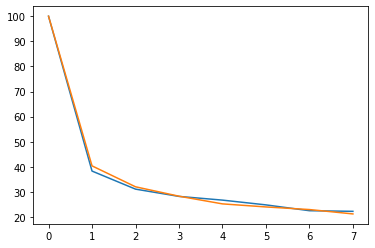

In [522]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.Rate1)
plt.plot(retention_B_group.Retention, retention_B_group.Rate1)

In [ ]:
# ВЫВОД: Удержание резко снизилось после установки и потом медленно снижалось, в А и В группах практически не отличтся.

In [ ]:
# ARPU = Доход / Активные пользователи (Средний доход от юзера)

In [523]:
revenue_A_group = df.query('AB_Cohort == "A" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'users_count'})

In [524]:
revenue_B_group = df.query('AB_Cohort == "B" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'users_count'})

In [528]:
retention_A_group["SumRevenue"] = revenue_A_group.SumRevenue
retention_B_group["SumRevenue"] = revenue_B_group.SumRevenue

In [537]:
retention_A_group["ARPU"] = revenue_A_group.SumRevenue/revenue_A_group.users_count
retention_B_group["ARPU"] = revenue_B_group.SumRevenue/revenue_B_group.users_count

In [538]:
retention_A_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU
0,0,4317,4317,100.00,3346,304.181818
1,1,1653,4317,38.29,995,142.142857
2,2,1342,4317,31.09,745,124.166667
3,3,1217,4317,28.19,484,121.000000
4,4,1153,4317,26.71,943,235.750000
5,5,1071,4317,24.81,106,106.000000
6,6,971,4317,22.49,697,348.500000
7,7,960,4317,22.24,818,272.666667


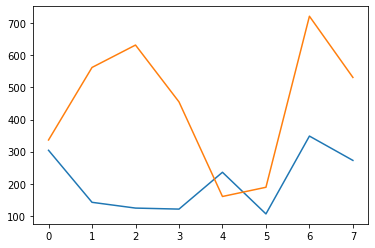

In [539]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.ARPU)
plt.plot(retention_B_group.Retention, retention_B_group.ARPU)

In [ ]:
# ВЫВОД: Средняя доходность от юзера в группе В выше

In [ ]:
# Lifetime value = Lifetime * ARPU (средняя сумма денег от одного пользователя за всю его «жизнь» в проекте.)

In [541]:
retention_B_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU
0,0,4319,4319,100.00,6726,336.300000
1,1,1743,4319,40.36,4498,562.250000
2,2,1383,4319,32.02,2528,632.000000
3,3,1221,4319,28.27,3640,455.000000
4,4,1089,4319,25.21,1122,160.285714
5,5,1036,4319,23.99,189,189.000000
6,6,991,4319,22.95,2887,721.750000
7,7,916,4319,21.21,3718,531.142857


In [543]:
retention_A_group["LV"] = retention_A_group.Retention * retention_A_group.ARPU
retention_B_group["LV"] = retention_B_group.Retention * retention_B_group.ARPU

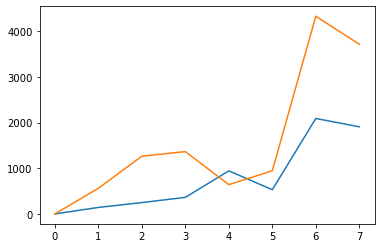

In [544]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.LV)
plt.plot(retention_B_group.Retention, retention_B_group.LV)

In [ ]:
# DAU - the number of unique users per day (Daily Active Users)

In [545]:
users_A_did_buying  = df.query('AB_Cohort == "A" & SumRevenue > 0 ')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count_did_buying'})

In [546]:
retention_A_group["users_count_did_buying"] = users_A_did_buying.users_count_did_buying

In [547]:
retention_A_group["DAU"] = round(retention_A_group.users_count_did_buying/retention_A_group.users_count*100,2)

In [548]:
retention_A_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU,LV,users_count_did_buying,DAU
0,0,4317,4317,100.00,3346,304.181818,0.000000,11,0.25
1,1,1653,4317,38.29,995,142.142857,142.142857,7,0.42
2,2,1342,4317,31.09,745,124.166667,248.333333,6,0.45
3,3,1217,4317,28.19,484,121.000000,363.000000,4,0.33
4,4,1153,4317,26.71,943,235.750000,943.000000,4,0.35
5,5,1071,4317,24.81,106,106.000000,530.000000,1,0.09
6,6,971,4317,22.49,697,348.500000,2091.000000,2,0.21
7,7,960,4317,22.24,818,272.666667,1908.666667,3,0.31


In [549]:
users_B_did_buying  = df.query('AB_Cohort == "B" & SumRevenue > 0 ')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count_did_buying'})

In [550]:
retention_B_group["users_count_did_buying"] = users_B_did_buying.users_count_did_buying

In [551]:
retention_B_group["DAU"] = round(retention_B_group.users_count_did_buying/retention_B_group.users_count*100,2)

In [552]:
retention_B_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU,LV,users_count_did_buying,DAU
0,0,4319,4319,100.00,6726,336.300000,0.000000,20,0.46
1,1,1743,4319,40.36,4498,562.250000,562.250000,8,0.46
2,2,1383,4319,32.02,2528,632.000000,1264.000000,4,0.29
3,3,1221,4319,28.27,3640,455.000000,1365.000000,8,0.66
4,4,1089,4319,25.21,1122,160.285714,641.142857,7,0.64
5,5,1036,4319,23.99,189,189.000000,945.000000,1,0.10
6,6,991,4319,22.95,2887,721.750000,4330.500000,4,0.40
7,7,916,4319,21.21,3718,531.142857,3718.000000,7,0.76


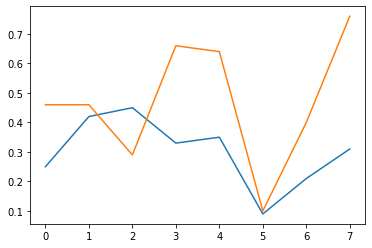

In [553]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.DAU)
plt.plot(retention_B_group.Retention, retention_B_group.DAU)

In [ ]:
# Средний чек

In [554]:
count_buyings_A = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [558]:
retention_A_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU,LV,users_count_did_buying,DAU
0,0,4317,4317,100.00,3346,304.181818,0.000000,11,0.25
1,1,1653,4317,38.29,995,142.142857,142.142857,7,0.42
2,2,1342,4317,31.09,745,124.166667,248.333333,6,0.45
3,3,1217,4317,28.19,484,121.000000,363.000000,4,0.33
4,4,1153,4317,26.71,943,235.750000,943.000000,4,0.35
5,5,1071,4317,24.81,106,106.000000,530.000000,1,0.09
6,6,971,4317,22.49,697,348.500000,2091.000000,2,0.21
7,7,960,4317,22.24,818,272.666667,1908.666667,3,0.31


In [559]:
retention_A_group["count_buyings"] = count_buyings_A.CountBuy

In [560]:
retention_A_group["Avg_Bill"] = round(retention_A_group.SumRevenue/retention_A_group.count_buyings,2)

In [561]:
retention_A_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU,LV,users_count_did_buying,DAU,count_buyings,Avg_Bill
0,0,4317,4317,100.00,3346,304.181818,0.000000,11,0.25,26,128.69
1,1,1653,4317,38.29,995,142.142857,142.142857,7,0.42,7,142.14
2,2,1342,4317,31.09,745,124.166667,248.333333,6,0.45,8,93.12
3,3,1217,4317,28.19,484,121.000000,363.000000,4,0.33,8,60.50
4,4,1153,4317,26.71,943,235.750000,943.000000,4,0.35,7,134.71
5,5,1071,4317,24.81,106,106.000000,530.000000,1,0.09,2,53.00
6,6,971,4317,22.49,697,348.500000,2091.000000,2,0.21,5,139.40
7,7,960,4317,22.24,818,272.666667,1908.666667,3,0.31,6,136.33


In [562]:
count_buyings_B = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [563]:
retention_B_group["count_buyings"] = count_buyings_B.CountBuy

In [564]:
retention_B_group["Avg_Bill"] = round(retention_B_group.SumRevenue/retention_B_group.count_buyings,2)

In [565]:
retention_B_group

,Retention,users_count,Retention_install,Rate1,SumRevenue,ARPU,LV,users_count_did_buying,DAU,count_buyings,Avg_Bill
0,0,4319,4319,100.00,6726,336.300000,0.000000,20,0.46,33,203.82
1,1,1743,4319,40.36,4498,562.250000,562.250000,8,0.46,19,236.74
2,2,1383,4319,32.02,2528,632.000000,1264.000000,4,0.29,9,280.89
3,3,1221,4319,28.27,3640,455.000000,1365.000000,8,0.66,21,173.33
4,4,1089,4319,25.21,1122,160.285714,641.142857,7,0.64,10,112.20
5,5,1036,4319,23.99,189,189.000000,945.000000,1,0.10,1,189.00
6,6,991,4319,22.95,2887,721.750000,4330.500000,4,0.40,6,481.17
7,7,916,4319,21.21,3718,531.142857,3718.000000,7,0.76,7,531.14


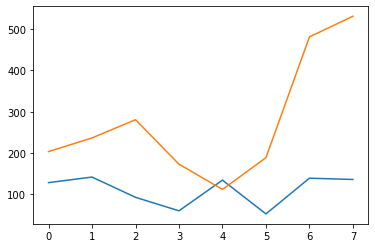

In [567]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.Avg_Bill)
plt.plot(retention_B_group.Retention, retention_B_group.Avg_Bill)

In [ ]:
# Среднее пройденное кол-во уровней

In [ ]:
# Теперь нам необходимо проверить, какая из гипотез верна:
#* Нулевая гипотеза Н0 - конверсии равны.
#* Альтернативная гипотеза - конверсии не равны.

In [ ]:
# стат.критерий (p-value), Хи-квадрат

In [157]:
import statsmodels.stats.proportion as proportion

In [158]:
??proportion.proportions_chisquare

In [159]:
chi2start, pval, table = proportion.proportions_chisquare(users_count['users_did_bought'],users_count['users_count'])

In [160]:
alpha = 0.05

In [161]:
print(pval < alpha) # Можем ли мы отклонить нулевую гипотезу

True


In [ ]:
# ВЫВОД: Конверсии НЕ равны!